In [1]:
import os
from shutil import copyfile
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from PIL import Image

In [2]:
villians_list = ['Darth Vader', 'Green Goblin', 'Joker', 'Thanos', 'Venom']

In [4]:
os.mkdir(r'C:\Users\Sahil\DS ML tests\Project Vilians Image Classification\training')
os.mkdir(r'C:\Users\Sahil\DS ML tests\Project Vilians Image Classification\testing')

In [5]:
for villian in villians_list:
    os.mkdir(os.path.join(r'C:\Users\Sahil\DS ML tests\Project Vilians Image Classification\training', villian))

In [7]:
os.mkdir(os.path.join(r'C:\Users\Sahil\DS ML tests\Project Vilians Image Classification\testing', 'test'))

In [3]:
base_path = r'C:\Users\Sahil\DS ML tests\Project Vilians Image Classification\Villains'
training_path = r'C:\Users\Sahil\DS ML tests\Project Vilians Image Classification\training'
testing_path = r'C:\Users\Sahil\DS ML tests\Project Vilians Image Classification\testing'
test_path = r'C:\Users\Sahil\DS ML tests\Project Vilians Image Classification\testing\test'

In [9]:
for villian in os.listdir(base_path):
    img_path = os.path.join(base_path, villian)
    count = 0
    
    for img in os.listdir(img_path):
        if count == 16:
            break
        source = os.path.join(img_path, img)
        dest = os.path.join(training_path, villian, img)
        count += 1
        copyfile(source, dest)
        

In [24]:
for villian in os.listdir(base_path):
    img_path = os.path.join(base_path, villian)
    
    for img in os.listdir(img_path)[-3:]:
        source = os.path.join(img_path, img)
        dest = os.path.join(test_path, img)
        copyfile(source, dest)
       

Darth Vader
Shape of image (168, 300, 3)


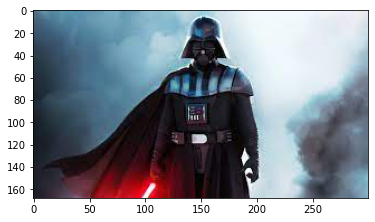

Green Goblin
Shape of image (168, 300, 3)


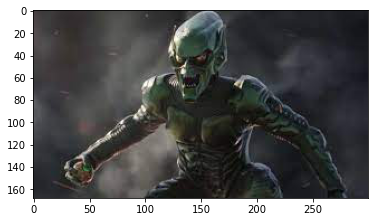

Joker
Shape of image (183, 275, 3)


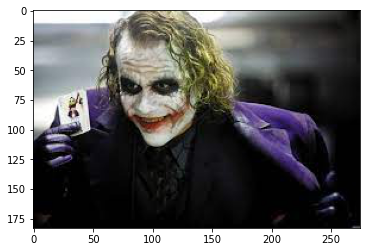

Thanos
Shape of image (210, 220, 3)


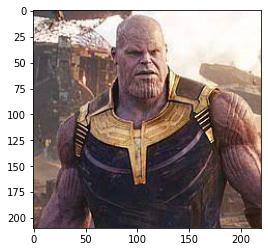

Venom
Shape of image (168, 300, 3)


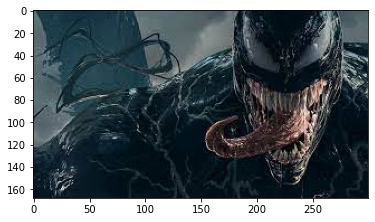

In [20]:
for villian in os.listdir(base_path):
    print(villian)
    img_path = os.path.join(base_path, villian)
    for img in os.listdir(img_path):
        img_array = mpimg.imread(os.path.join(img_path, img))
        print('Shape of image', img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break

Shape of image (159, 318, 3)


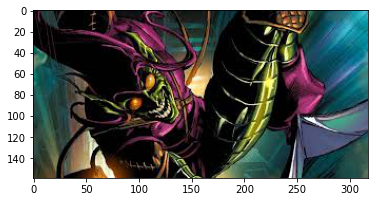

Shape of image (225, 225, 3)


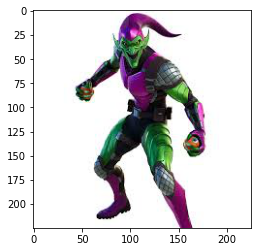

Shape of image (228, 221, 3)


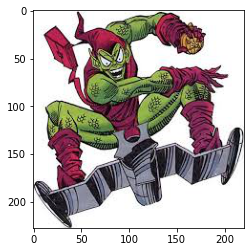

Shape of image (276, 183, 3)


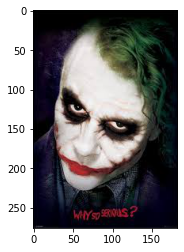

Shape of image (225, 225, 3)


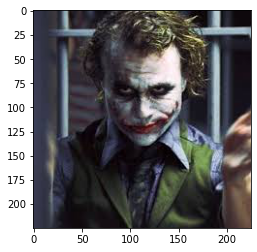

In [25]:
count = 0
for img in os.listdir(test_path):
    if count == 5:
        break
    img_array = mpimg.imread(os.path.join(test_path, img))
    print('Shape of image', img_array.shape)
    plt.imshow(img_array)
    plt.show()
    count += 1

In [4]:
#defining target image size and batch size
image_size = (240, 240)
batch_size = 8
val_size = 0.2

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split = val_size)

train_generator = train_datagen.flow_from_directory(training_path, 
                                                   target_size = image_size,
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle = True,
                                                   seed = 10,
                                                   subset = 'training')



val_generator = train_datagen.flow_from_directory(
                                                    training_path,
                                                    target_size = image_size,
                                                    class_mode = 'categorical',
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    seed = 10,
                                                    subset = 'validation'
                                        
                                                  )

Found 65 images belonging to 5 classes.
Found 15 images belonging to 5 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                                                    testing_path,
                                                    target_size = image_size,
                                                    classes = ['test'],
                                                    batch_size = batch_size
                                                  )

Found 15 images belonging to 1 classes.


In [7]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'Darth Vader', 1: 'Green Goblin', 2: 'Joker', 3: 'Thanos', 4: 'Venom'}

In [11]:
model = keras.Sequential([
    #CNN1
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (image_size[0], image_size[1],3)),
    layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    
    #CNN2
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    layers.Dropout(0.4),
    
     #CNN2
    #layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    #layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    #layers.Dropout(0.4),
    
      #CNN2
    #layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu'),
    #layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    #layers.Dropout(0.4),
    
     #Hidden Layers 
    layers.Flatten(),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dropout(0.4),
    
    #Output Layer
    layers.Dense(units = 5, activation = 'softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 119, 119, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 59, 59, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 222784)           

In [12]:
#compiling the model
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
hist = model.fit(train_generator, epochs = 50, validation_data = val_generator)

Epoch 1/50
9/9 [==============================] - 11s 1s/step - loss: 2.0840 - accuracy: 0.2308 - val_loss: 1.6246 - val_accuracy: 0.2000
Epoch 2/50
9/9 [==============================] - 8s 925ms/step - loss: 1.6077 - accuracy: 0.2615 - val_loss: 1.6168 - val_accuracy: 0.2000
Epoch 3/50
9/9 [==============================] - 9s 939ms/step - loss: 1.5586 - accuracy: 0.3385 - val_loss: 1.6005 - val_accuracy: 0.3333
Epoch 4/50
9/9 [==============================] - 9s 930ms/step - loss: 1.5283 - accuracy: 0.3385 - val_loss: 1.8083 - val_accuracy: 0.2000
Epoch 5/50
9/9 [==============================] - 9s 967ms/step - loss: 1.5694 - accuracy: 0.2769 - val_loss: 1.6452 - val_accuracy: 0.2667
Epoch 6/50
9/9 [==============================] - 9s 944ms/step - loss: 1.4844 - accuracy: 0.3846 - val_loss: 1.6821 - val_accuracy: 0.4000
Epoch 7/50
9/9 [==============================] - 9s 936ms/step - loss: 1.4100 - accuracy: 0.4154 - val_loss: 1.8144 - val_accuracy: 0.2667
Epoch 8/50
9/9 [======

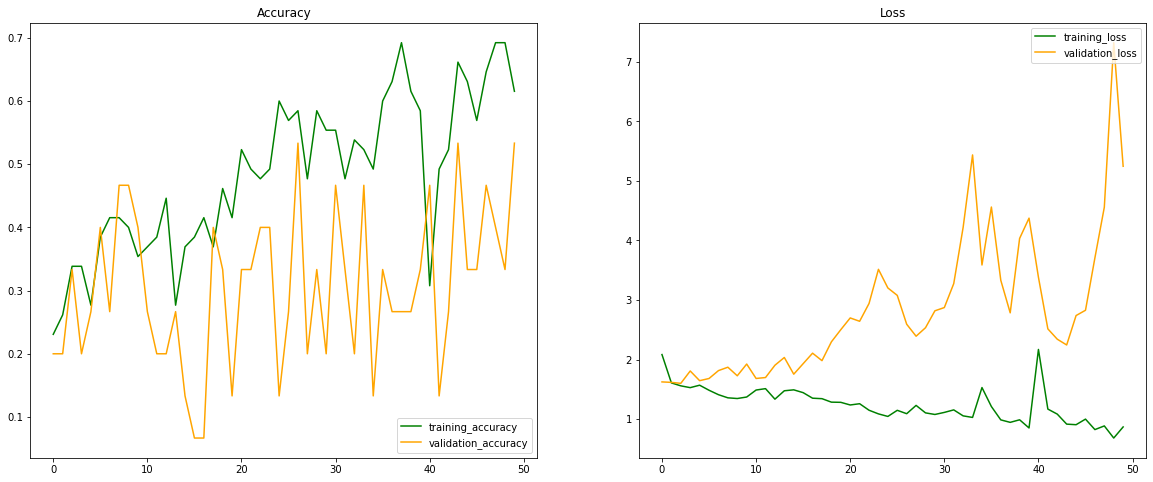

In [14]:
plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(50)
plt.plot(epochs, train_acc, label = 'training_accuracy', color = 'green')
plt.plot(epochs, val_acc, label = 'validation_accuracy', color = 'orange')
plt.legend(loc = 'lower right')
plt.title('Accuracy')


plt.subplot(1, 2, 2)
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(50)
plt.plot(epochs, train_loss, label = 'training_loss', color = 'green')
plt.plot(epochs, val_loss, label = 'validation_loss', color = 'orange')
plt.legend(loc = 'upper right')
plt.title('Loss')

plt.show()